## Churn probability Prediction using regression and classification techniques
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. In this case study we need to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

The solution is divided into the following sections:
1. Evaluation and conclusion on train.csv dataset 
- Data understanding and Preparation
- Data cleaning
- Feature Engineering and Data Visualization
- Handle Class Imbalance
- Scaling   
- Principle Component Analysis
- Logistic Regression ( With RFE and PCA)
- Decision Tree
- ADA boosting with Decision Tree
- Random Forest
- Conclusion

2. Execution of optimum(best) model on test.csv dataset
- Data cleaning and Preparation
- Feature Engineering
- Prediction using best model obtained from train dataset
- Exporting data to solution.csv

In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score,classification_report,roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA,IncrementalPCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## Evaluation and conclusion on train.csv dataset :

### 1. Data Understanding and Preparation

In [2]:
# Load Dataset
telecom_dataset = pd.read_csv("train.csv")

In [3]:
# Find total number of rows and columns
telecom_dataset.shape

(69999, 172)

Observation : There are 69999 rows and 172 columns

In [4]:
# Preview Dataset
telecom_dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
# Find and print duplicates
print("The total number of Duplicate Rows are" , telecom_dataset.duplicated().sum())

The total number of Duplicate Rows are 0


#### Find numerical and categorical columns

In [6]:
category_columns = telecom_dataset.select_dtypes(include=['object' ,'O']).columns.tolist()
print(category_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [7]:
numeric_columns = telecom_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',

### 2. Data Cleaning

#### Handling Null Values

In [8]:
# Find the percentage of null values present in the dataset
round(100*telecom_dataset.isnull().mean(), 2).sort_values(ascending=False)

arpu_3g_6                   74.9
count_rech_2g_6             74.9
night_pck_user_6            74.9
arpu_2g_6                   74.9
date_of_last_rech_data_6    74.9
                            ... 
last_day_rch_amt_8           0.0
vol_2g_mb_6                  0.0
vol_2g_mb_7                  0.0
vol_2g_mb_8                  0.0
churn_probability            0.0
Length: 172, dtype: float64

In [9]:
# Checking information about data.
print(telecom_dataset.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(telecom_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
count_rech_2g_6,float64,17568,52431,74.9,30
night_pck_user_6,float64,17568,52431,74.9,2
arpu_2g_6,float64,17568,52431,74.9,5389
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
last_day_rch_amt_8,int64,69999,0,0.0,191
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359


In [10]:
#Checking for missing values.
missing_values = metadata_matrix(telecom_dataset)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
arpu_3g_6,float64,74.9
night_pck_user_6,float64,74.9
arpu_2g_6,float64,74.9
date_of_last_rech_data_6,object,74.9
total_rech_data_6,float64,74.9
...,...,...
monthly_3g_6,int64,0.0
id,int64,0.0
vol_3g_mb_7,float64,0.0
total_rech_num_7,int64,0.0


#### Missing value treatment

In [11]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_upd = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',  'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',  'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',  'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',  'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',  'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',  'og_others_6', 'og_others_7', 'og_others_8']
telecom_dataset[og_data_columns_upd] = telecom_dataset[og_data_columns_upd].fillna(0)
telecom_dataset[og_data_columns_upd].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.00,2.23,...,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.00,0.53,...,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,1.63,6.99,...,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0
4,21.28,4.83,6.13,56.99,38.11,9.63,15.73,0.0,0.00,10.16,...,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0


In [12]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer

ic_data_columns_upd = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',  'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',  'ic_others_6', 'ic_others_7', 'ic_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_dataset[ic_data_columns_upd] = telecom_dataset[ic_data_columns_upd].fillna(0)
telecom_dataset[ic_data_columns_upd].head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,...,ic_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8
0,0.00,0.0,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,...,0.00,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00
1,0.00,0.0,0.0,3.44,39.44,25.03,0.00,0.00,0.00,0.00,...,0.00,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40
2,0.00,0.0,0.0,94.38,31.34,30.01,11.69,0.00,0.00,18.21,...,0.25,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00
3,0.00,0.0,0.0,86.21,49.89,81.03,0.00,0.00,0.00,8.89,...,0.00,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00
4,53.64,0.0,0.0,21.54,9.36,28.31,0.00,0.00,0.00,0.00,...,0.00,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14


In [13]:
## Fill null values for data pack recharge amount and count to 0 
## 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 
## 'max_rech_data_8',  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
## 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',  'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8','loc_og_t2o_mou'
## 'std_og_t2o_mou','loc_ic_t2o_mou'
data_recharge_columns_upd = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
telecom_dataset[data_recharge_columns_upd] = telecom_dataset[data_recharge_columns_upd].fillna(0)
telecom_dataset[data_recharge_columns_upd].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,0.0,0.0,0.0


In [14]:
#finding missing values more than 70%
metadata = metadata_matrix(telecom_dataset)
condition = metadata['Null_Percentage'] > 70
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
arpu_3g_6,float64,17568,52431,74.90,5506
fb_user_6,float64,17568,52431,74.90,2
fb_user_7,float64,17865,52134,74.48,2
arpu_2g_7,float64,17865,52134,74.48,5056
night_pck_user_7,float64,17865,52134,74.48,2
arpu_3g_7,float64,17865,52134,74.48,5389
date_of_last_rech_data_7,object,17865,52134,74.48,31


In [15]:
# remove high missing values from original dataframe
high_missing_value_columns = high_missing_values.index
high_missing_value_columns
telecom_dataset.drop(columns=high_missing_value_columns, inplace=True)

In [16]:
telecom_dataset.shape

(69999, 157)

#### Filtering High Value Customers  based on recharge amount

In [17]:
telecom_dataset['Average_recharge_amt'] = (telecom_dataset['total_rech_amt_6'].median() + telecom_dataset['total_rech_amt_7'].median() + telecom_dataset['total_rech_amt_8'].median())/3

In [18]:
telecom_dataset.shape

(69999, 158)

In [19]:
# Take high value customers whose average recharge amount is greater than 70th percentile
telecom_dataset=telecom_dataset[(telecom_dataset['Average_recharge_amt']>= telecom_dataset['Average_recharge_amt'].quantile(0.7))]

In [20]:
telecom_dataset.shape

(69999, 158)

In [21]:
list(telecom_dataset.columns)

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

### 3. Feature Engineering and Data Visualization

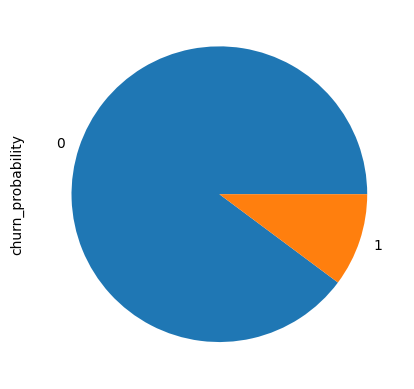

In [22]:
telecom_dataset['churn_probability'].value_counts().plot.pie()
plt.show()

In [23]:
churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==1])/len(telecom_dataset) ) * 100
print("Percentage of Churn Customer =",churn_per)
non_churn_per = ( len(telecom_dataset[telecom_dataset.churn_probability==0])/len(telecom_dataset) ) * 100
print("Percentage of Non-churn Customer =",non_churn_per)

Percentage of Churn Customer = 10.188716981671167
Percentage of Non-churn Customer = 89.81128301832884


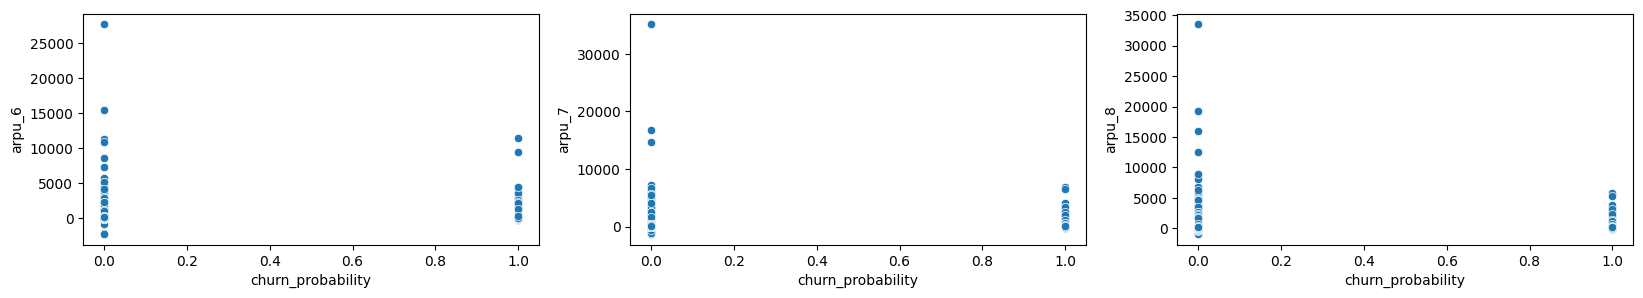

In [24]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="arpu_8")
plt.show()

##### Customers who have more average revenue per user in month of august are high value customer

In [25]:
telecom_dataset['total_data_rech_amt_6'] = telecom_dataset['total_rech_data_6'] * telecom_dataset['av_rech_amt_data_6']
telecom_dataset['total_data_rech_amt_7'] = telecom_dataset['total_rech_data_7'] * telecom_dataset['av_rech_amt_data_7']
telecom_dataset['total_data_rech_amt_8'] = telecom_dataset['total_rech_data_8'] * telecom_dataset['av_rech_amt_data_8']
telecom_dataset['total_rech_6'] = telecom_dataset['total_data_rech_amt_6'] + telecom_dataset['total_rech_amt_6']
telecom_dataset['total_rech_7'] = telecom_dataset['total_data_rech_amt_7'] + telecom_dataset['total_rech_amt_7']
telecom_dataset['total_rech_8'] = telecom_dataset['total_data_rech_amt_8'] + telecom_dataset['total_rech_amt_8']
telecom_dataset.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_recharge_amt,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,77.0,65.0,10.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0.00,0.00,0,224.666667,0.0,145.0,0.0,0.0,290.0,50.0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,70.0,120.0,0.0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,160.0,240.0,130.0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0.00,0.00,0,224.666667,1225.0,1337.0,852.0,1515.0,1473.0,974.0
5,5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,86.193,83.351,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,100.0,90.0,100.0
6,6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,54.173,95.130,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,130.0,0.0,130.0
7,7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.861,167.869,...,73.56,177.14,0,224.666667,198.0,198.0,198.0,396.0,396.0,396.0
8,8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.550,90.250,...,0.00,0.00,1,224.666667,0.0,0.0,0.0,200.0,0.0,150.0
9,9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,101.984,259.265,...,0.00,0.00,0,224.666667,0.0,0.0,0.0,128.0,160.0,279.0


In [26]:
## Removing 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
## Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 

telecom_dataset = telecom_dataset.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'])
telecom_dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Average_recharge_amt,total_rech_6,total_rech_7,total_rech_8
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,1958,0.0,0.0,0.0,0,224.666667,77.0,65.0,10.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,710,0.0,0.0,0.0,0,224.666667,0.0,290.0,50.0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,882,0.0,0.0,0.0,0,224.666667,70.0,120.0,0.0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,982,0.0,0.0,0.0,0,224.666667,160.0,240.0,130.0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,647,0.0,0.0,0.0,0,224.666667,1515.0,1473.0,974.0


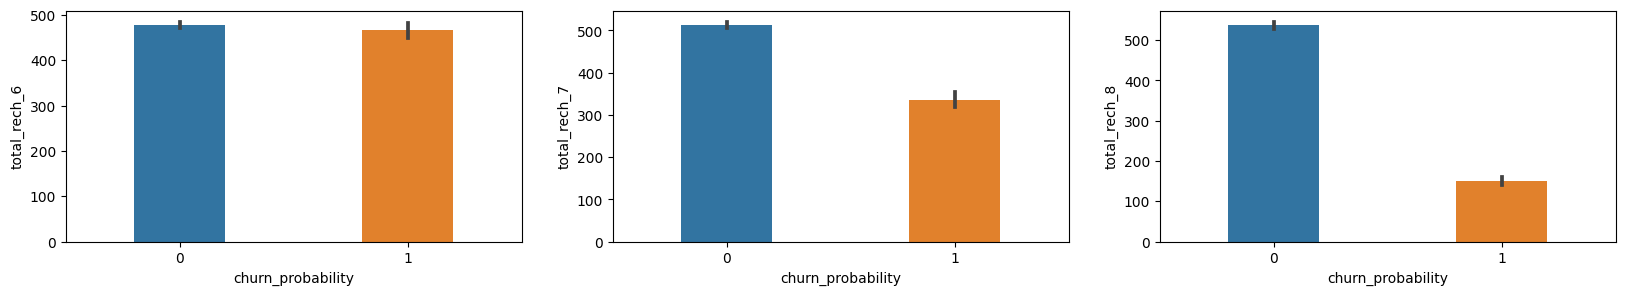

In [27]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="total_rech_8",width=0.4)
plt.show()

##### It is observed that customers with good recharge in August are high value customer

In [28]:
## Add all roaming incoming and outgoing columns and add a new column 
telecom_dataset['roam_any_6'] = telecom_dataset['roam_ic_mou_6'] + telecom_dataset['roam_og_mou_6'] 
telecom_dataset['roam_any_7'] = telecom_dataset['roam_ic_mou_7'] + telecom_dataset['roam_og_mou_7'] 
telecom_dataset['roam_any_8'] = telecom_dataset['roam_ic_mou_8'] + telecom_dataset['roam_og_mou_8'] 

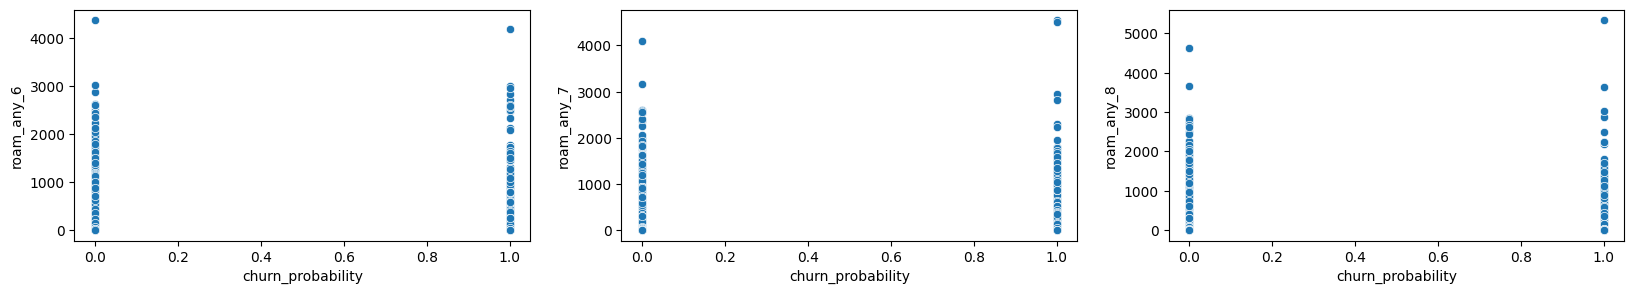

In [29]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_6")
plt.subplot(1,3,2)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_7")
plt.subplot(1,3,3)
sns.scatterplot(data=telecom_dataset, x="churn_probability",y="roam_any_8")
plt.show()

#### It is observed that customers who have used more raoming pack in june, are high likely to churn

In [30]:
# dropping all roaming incoming and outgoing columns
telecom_dataset = telecom_dataset.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])

In [31]:
## Add all local incoming and outgoing columns and add a new column 
telecom_dataset['local_any_6'] = telecom_dataset.loc_og_t2t_mou_6 + telecom_dataset.loc_og_t2m_mou_6 + telecom_dataset.loc_og_t2f_mou_6 + telecom_dataset.loc_og_t2c_mou_6 + telecom_dataset.loc_og_mou_6 + telecom_dataset.loc_ic_t2t_mou_6 + telecom_dataset.loc_ic_t2m_mou_6 + telecom_dataset.loc_ic_t2f_mou_6+ telecom_dataset.loc_ic_mou_6
telecom_dataset['local_any_7'] = telecom_dataset.loc_og_t2t_mou_7 + telecom_dataset.loc_og_t2m_mou_7 + telecom_dataset.loc_og_t2f_mou_7 + telecom_dataset.loc_og_t2c_mou_7 + telecom_dataset.loc_og_mou_7 + telecom_dataset.loc_ic_t2t_mou_7 + telecom_dataset.loc_ic_t2m_mou_7 + telecom_dataset.loc_ic_t2f_mou_7+ telecom_dataset.loc_ic_mou_7
telecom_dataset['local_any_8'] = telecom_dataset.loc_og_t2t_mou_8 + telecom_dataset.loc_og_t2m_mou_8 + telecom_dataset.loc_og_t2f_mou_8 + telecom_dataset.loc_og_t2c_mou_8 + telecom_dataset.loc_og_mou_8 + telecom_dataset.loc_ic_t2t_mou_8 + telecom_dataset.loc_ic_t2m_mou_8 + telecom_dataset.loc_ic_t2f_mou_8+ telecom_dataset.loc_ic_mou_8

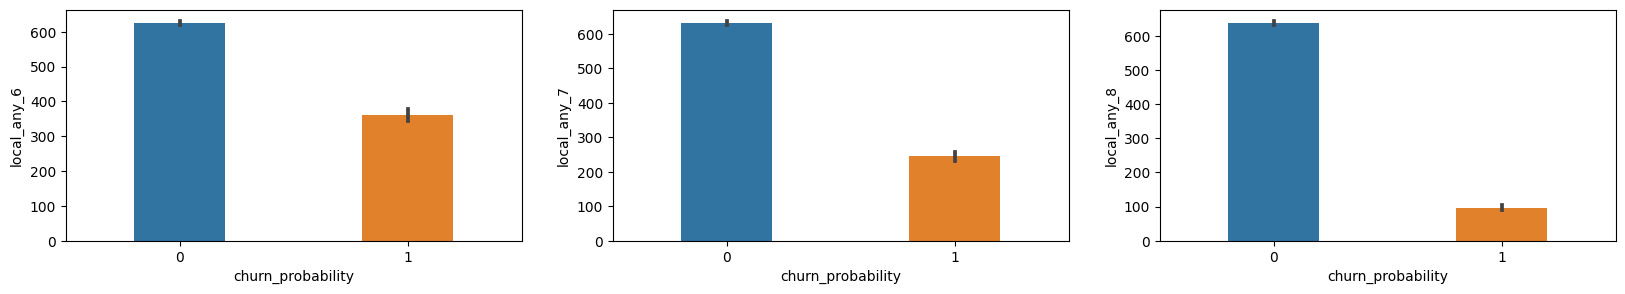

In [32]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="local_any_8",width=0.4)
plt.show()

#### It is observed that more customers with local usage in june and july, are highly likely to churn

In [33]:
#dropping local incoming and outgoing coloumns
telecom_dataset = telecom_dataset.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])

In [34]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['std_any_6'] = telecom_dataset.std_og_t2t_mou_6 + telecom_dataset.std_og_t2m_mou_6 + telecom_dataset.std_og_t2f_mou_6 + telecom_dataset.std_og_mou_6 + telecom_dataset.std_ic_t2t_mou_6 + telecom_dataset.std_ic_t2m_mou_6 + telecom_dataset.std_ic_t2f_mou_6 + telecom_dataset.std_ic_mou_6
telecom_dataset['std_any_7'] = telecom_dataset.std_og_t2t_mou_7 + telecom_dataset.std_og_t2m_mou_7 + telecom_dataset.std_og_t2f_mou_7 + telecom_dataset.std_og_mou_7 + telecom_dataset.std_ic_t2t_mou_7 + telecom_dataset.std_ic_t2m_mou_7 + telecom_dataset.std_ic_t2f_mou_7 + telecom_dataset.std_ic_mou_7
telecom_dataset['std_any_8'] = telecom_dataset.std_og_t2t_mou_8 + telecom_dataset.std_og_t2m_mou_8 + telecom_dataset.std_og_t2f_mou_8 + telecom_dataset.std_og_mou_8 + telecom_dataset.std_ic_t2t_mou_8 + telecom_dataset.std_ic_t2m_mou_8 + telecom_dataset.std_ic_t2f_mou_8 + telecom_dataset.std_ic_mou_8

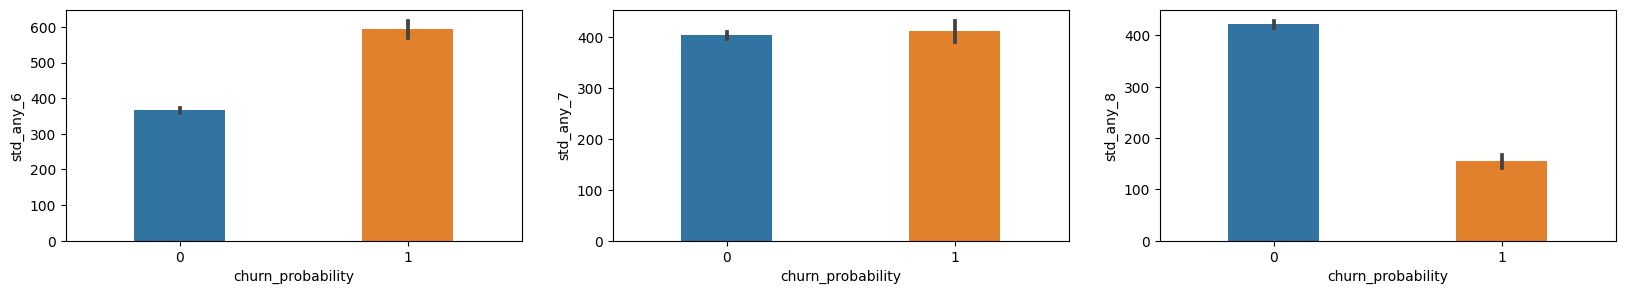

In [35]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="std_any_8",width=0.4)
plt.show()

#### It is observed that more customers with standard usage in june and july, are highly likely to churn

In [36]:
#dropping standard incoming and outgoing coloumns
telecom_dataset = telecom_dataset.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])

In [37]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset['spl_any_6'] = telecom_dataset.isd_og_mou_6 + telecom_dataset.spl_og_mou_6 + telecom_dataset.og_others_6 + telecom_dataset.spl_ic_mou_6 + telecom_dataset.isd_ic_mou_6 + telecom_dataset.ic_others_6
telecom_dataset['spl_any_7'] = telecom_dataset.isd_og_mou_7 + telecom_dataset.spl_og_mou_7 + telecom_dataset.og_others_7 + telecom_dataset.spl_ic_mou_7 + telecom_dataset.isd_ic_mou_7 + telecom_dataset.ic_others_7
telecom_dataset['spl_any_8'] = telecom_dataset.isd_og_mou_8 + telecom_dataset.spl_og_mou_8 + telecom_dataset.og_others_8 + telecom_dataset.spl_ic_mou_8 + telecom_dataset.isd_ic_mou_8 + telecom_dataset.ic_others_8

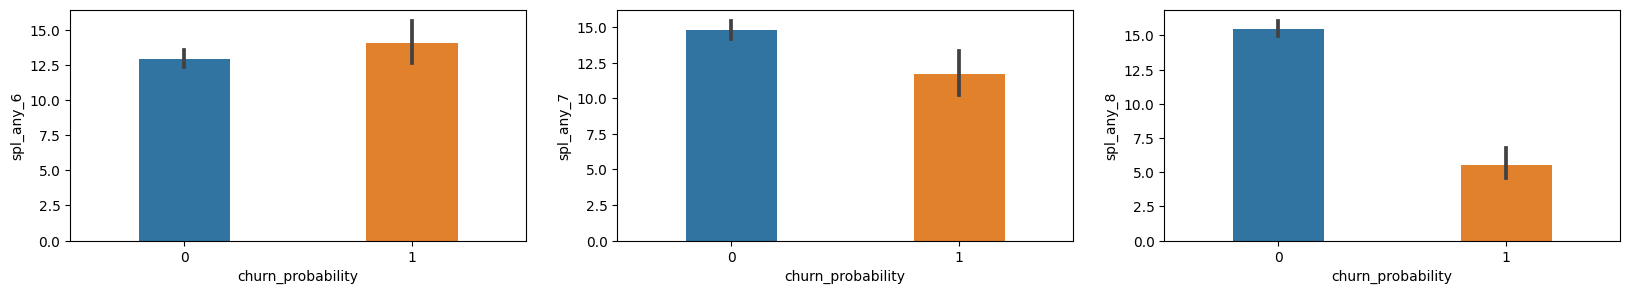

In [38]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_6",width=0.4)
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_7",width=0.4)
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="spl_any_8",width=0.4)
plt.show()

#### It is observed that more customers with special usage in august, are high value customers

In [39]:
## dropping all standard incoming and outgoing columns
telecom_dataset = telecom_dataset.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])

In [40]:
## Add all data 2g and 3g columns and add a new column 
telecom_dataset['data_used_6'] = telecom_dataset.vol_2g_mb_6 + telecom_dataset.vol_3g_mb_6 + telecom_dataset.jun_vbc_3g
telecom_dataset['data_used_7'] = telecom_dataset.vol_2g_mb_7 + telecom_dataset.vol_3g_mb_7 + telecom_dataset.jul_vbc_3g
telecom_dataset['data_used_8'] = telecom_dataset.vol_2g_mb_8 + telecom_dataset.vol_3g_mb_8 + telecom_dataset.aug_vbc_3g

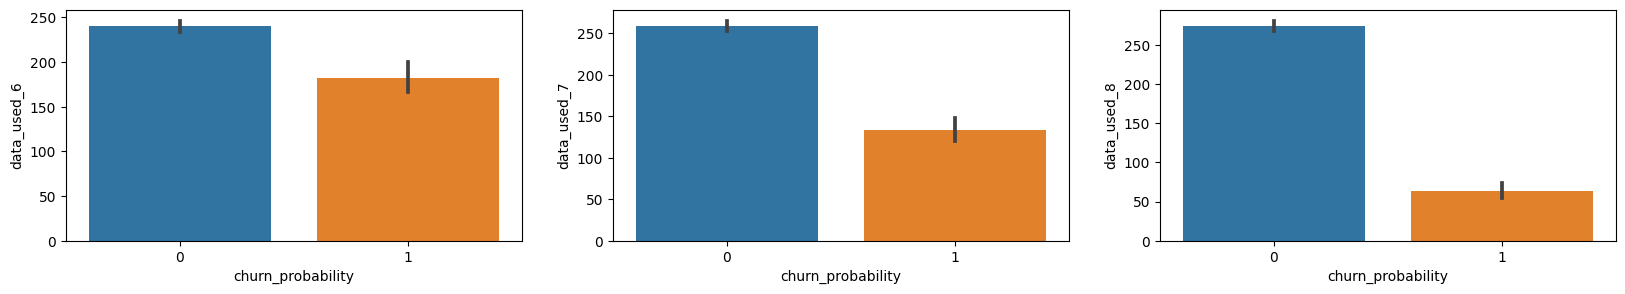

In [41]:
plt.figure(figsize=(20, 3))
plt.subplot(1,3,1)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_6")
plt.subplot(1,3,2)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_7")
plt.subplot(1,3,3)
sns.barplot(data=telecom_dataset, x="churn_probability",y="data_used_8")
plt.show()

#### It is observed that more customers with data usage in july, are high value customers

In [42]:
# dropping all data 2g and 3g columns
telecom_dataset = telecom_dataset.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'])
telecom_dataset = telecom_dataset.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])


In [43]:
## Dropping columns with all values as 0
telecom_dataset = telecom_dataset.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'])

In [44]:
## Drop  columns which will not add value 
telecom_dataset = telecom_dataset.drop(columns=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])

In [45]:
## max column can be removed as  total recharge column is there
telecom_dataset = telecom_dataset.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'])

In [46]:
## Removing columns 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

telecom_dataset = telecom_dataset.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'])

In [47]:
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', '
telecom_dataset = telecom_dataset.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'])
telecom_dataset.head()

,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,0,109,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,...,54.63,145.10,465.13,32.37,9.69,1.32,0.66,0.0,0.00,0.00
1,1,109,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,...,79.84,0.00,0.00,0.00,0.00,30.73,31.67,0.0,356.87,0.00
2,2,109,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,...,60.01,117.69,174.94,12.76,2.89,1.38,0.25,0.0,0.00,0.00
3,3,109,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,...,217.34,50.09,76.54,14.82,14.95,9.13,25.61,0.0,0.00,0.00
4,4,109,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,...,88.11,8.70,0.00,0.00,0.00,17.00,0.00,390.8,308.89,213.47


In [48]:
telecom_dataset.shape

(69999, 47)

In [49]:
list(telecom_dataset.columns)

['id',
 'circle_id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'churn_probability',
 'Average_recharge_amt',
 'total_rech_6',
 'total_rech_7',
 'total_rech_8',
 'roam_any_6',
 'roam_any_7',
 'roam_any_8',
 'local_any_6',
 'local_any_7',
 'local_any_8',
 'std_any_6',
 'std_any_7',
 'std_any_8',
 'spl_any_6',
 'spl_any_7',
 'spl_any_8',
 'data_used_6',
 'data_used_7',
 'data_used_8']

In [50]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    69999 non-null  int64  
 1   circle_id             69999 non-null  int64  
 2   arpu_6                69999 non-null  float64
 3   arpu_7                69999 non-null  float64
 4   arpu_8                69999 non-null  float64
 5   total_og_mou_6        69999 non-null  float64
 6   total_og_mou_7        69999 non-null  float64
 7   total_og_mou_8        69999 non-null  float64
 8   total_ic_mou_6        69999 non-null  float64
 9   total_ic_mou_7        69999 non-null  float64
 10  total_ic_mou_8        69999 non-null  float64
 11  last_day_rch_amt_6    69999 non-null  int64  
 12  last_day_rch_amt_7    69999 non-null  int64  
 13  last_day_rch_amt_8    69999 non-null  int64  
 14  monthly_2g_6          69999 non-null  int64  
 15  monthly_2g_7       

In [51]:
X = telecom_dataset.drop(['churn_probability'], axis=1)

X.head()

,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,0,109,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,...,54.63,145.10,465.13,32.37,9.69,1.32,0.66,0.0,0.00,0.00
1,1,109,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,...,79.84,0.00,0.00,0.00,0.00,30.73,31.67,0.0,356.87,0.00
2,2,109,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,...,60.01,117.69,174.94,12.76,2.89,1.38,0.25,0.0,0.00,0.00
3,3,109,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,...,217.34,50.09,76.54,14.82,14.95,9.13,25.61,0.0,0.00,0.00
4,4,109,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,...,88.11,8.70,0.00,0.00,0.00,17.00,0.00,390.8,308.89,213.47


In [52]:
y = telecom_dataset['churn_probability'] # response variable in Y

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [53]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4. Handle Class Imbalance

In [54]:
y.value_counts(normalize=True).to_frame()

,churn_probability
0,0.898113
1,0.101887


In [55]:
# Ratio of classes
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.113


Synthetic Minority Class Oversampling Technique (SMOTE) used to handle this

In [56]:
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,48645,109,145.463,111.483,223.732,12.19,25.83,16.53,12.39,13.36,...,81.92,2.46,32.64,0.00,0.00,0.00,0.00,385.75,486.24,770.01
1,54979,109,107.101,31.592,106.170,60.88,65.98,107.01,410.13,486.76,...,918.35,144.70,116.76,250.66,0.29,2.72,11.57,0.00,0.00,0.00
2,7134,109,721.506,611.158,553.857,984.03,1124.94,912.09,313.01,329.94,...,1881.67,549.19,1029.10,520.96,4.01,0.31,0.76,0.00,0.00,0.00
3,6361,109,101.530,79.484,196.600,40.09,66.68,243.49,132.69,114.66,...,539.70,125.84,83.08,330.72,0.00,0.00,0.00,0.00,0.00,0.00
4,6647,109,78.308,146.066,83.040,127.13,177.04,108.39,235.84,295.46,...,776.22,77.72,44.14,7.28,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
X_train = X_train_resampled
y_train = y_train_resampled

### 5. Scaling

In [58]:
#Finding numerical columns
numeric_columns = telecom_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('churn_probability')

In [59]:
# scaling the features - necessary before PCA
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.fit_transform(X_test[numeric_columns])
X_train.head()


,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,0.681263,0.0,-0.424642,-0.404910,0.084864,-0.634287,-0.531270,-0.463396,-0.579049,-0.527182,...,-0.408531,-0.514814,-0.423208,-0.384560,-0.188711,-0.183258,-0.161379,0.285866,0.444127,0.929837
1,0.994135,0.0,-0.543817,-0.651286,-0.289738,-0.532968,-0.444884,-0.238853,0.942804,1.322024,...,0.824466,-0.356762,-0.324844,-0.035473,-0.184277,-0.142953,0.024258,-0.276686,-0.266037,-0.247609
2,-1.369197,0.0,1.364875,1.136039,1.136781,1.388017,1.833533,1.759108,0.571199,0.709450,...,2.244514,0.092693,0.741977,0.340965,-0.127403,-0.178665,-0.149185,-0.276686,-0.266037,-0.247609
3,-1.407380,0.0,-0.561123,-0.503591,-0.001590,-0.576230,-0.443378,0.099848,-0.118751,-0.131482,...,0.266291,-0.377718,-0.364227,0.076024,-0.188711,-0.183258,-0.161379,-0.276686,-0.266037,-0.247609
4,-1.393253,0.0,-0.633264,-0.298259,-0.363440,-0.395108,-0.205932,-0.235428,0.275927,0.574763,...,0.614949,-0.431188,-0.409761,-0.374421,-0.188711,-0.183258,-0.161379,-0.276686,-0.266037,-0.247609


### 6. Principle Component Analysis

In [60]:
pca = PCA(random_state=100)
pca.fit(X_train)
pca.components_

array([[ 3.86198366e-03,  2.22044605e-16,  2.30963268e-01, ...,
         1.46473497e-01,  1.65593688e-01,  1.66375599e-01],
       [ 8.71373862e-04, -2.77555756e-17, -7.84094631e-02, ...,
         2.72963085e-01,  2.87772529e-01,  2.78077123e-01],
       [ 5.48036884e-03, -0.00000000e+00, -1.38892546e-01, ...,
         7.64351568e-03,  1.05865581e-02,  2.51880926e-02],
       ...,
       [ 8.91350659e-06,  8.43807446e-16,  4.57601461e-05, ...,
        -6.33980987e-05,  4.14430291e-06,  8.20155525e-06],
       [-1.71125326e-17,  9.98582344e-01, -2.21901983e-16, ...,
        -1.66533454e-16,  1.11022302e-16, -1.38777878e-16],
       [ 0.00000000e+00, -5.32287674e-02, -5.29090660e-17, ...,
        -7.06899816e-17,  8.67361738e-18,  5.55111512e-17]])

Looking at the explained variance ratio for each component

In [61]:
pca.explained_variance_ratio_

array([1.87418989e-01, 1.07725758e-01, 8.59735314e-02, 6.38784050e-02,
       5.48610777e-02, 4.97193340e-02, 4.53115542e-02, 4.22651444e-02,
       3.78607920e-02, 2.82311163e-02, 2.28162167e-02, 2.19406585e-02,
       2.09093822e-02, 1.92181572e-02, 1.75163478e-02, 1.58026518e-02,
       1.38339209e-02, 1.30237358e-02, 1.24654816e-02, 1.22059527e-02,
       1.19372631e-02, 1.16951466e-02, 1.12852744e-02, 1.08188251e-02,
       1.02593914e-02, 9.66329812e-03, 8.25209788e-03, 8.15961911e-03,
       6.54489236e-03, 5.46506905e-03, 5.04950797e-03, 4.66003341e-03,
       4.23713288e-03, 3.68784319e-03, 3.40261911e-03, 3.13158519e-03,
       2.28219920e-03, 2.12912391e-03, 1.74549987e-03, 1.66181452e-03,
       9.52537224e-04, 6.50319176e-07, 2.20597125e-07, 1.47846478e-07,
       3.69618784e-32, 8.92960329e-34])

In [62]:
## Verifying PC and variables
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,3.861984e-03,8.713739e-04,id
1,2.220446e-16,-2.775558e-17,circle_id
2,2.309633e-01,-7.840946e-02,arpu_6
3,2.704282e-01,-7.849291e-02,arpu_7
4,2.596674e-01,-4.940146e-02,arpu_8
5,1.726673e-01,-2.164825e-01,total_og_mou_6
6,2.103798e-01,-2.342581e-01,total_og_mou_7
7,2.072378e-01,-1.910439e-01,total_og_mou_8
8,1.635164e-01,-1.275057e-01,total_ic_mou_6
9,1.889576e-01,-1.375933e-01,total_ic_mou_7


Making a scree plot for the explained variance

In [63]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

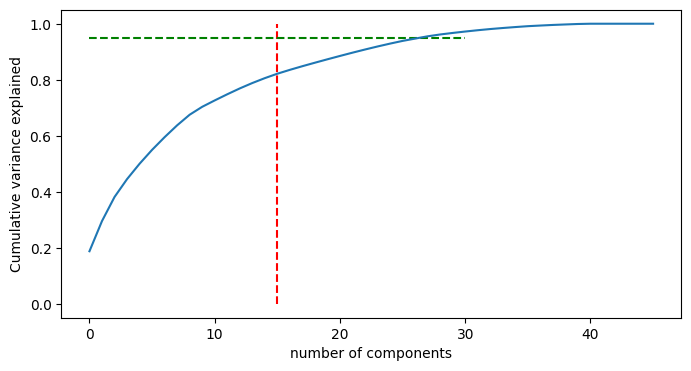

In [64]:
fig = plt.figure(figsize=[8,4])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel('number of components')
plt.show()

Lets try to find number of components, based on variance

In [65]:
pca2 = PCA(0.80)
X_pca2 = pca2.fit_transform(X_train)
X_pca2.shape

(87932, 15)

Perform PCA with 15 components

In [66]:
pca_final = IncrementalPCA(n_components=15)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(87932, 15)

<AxesSubplot:>

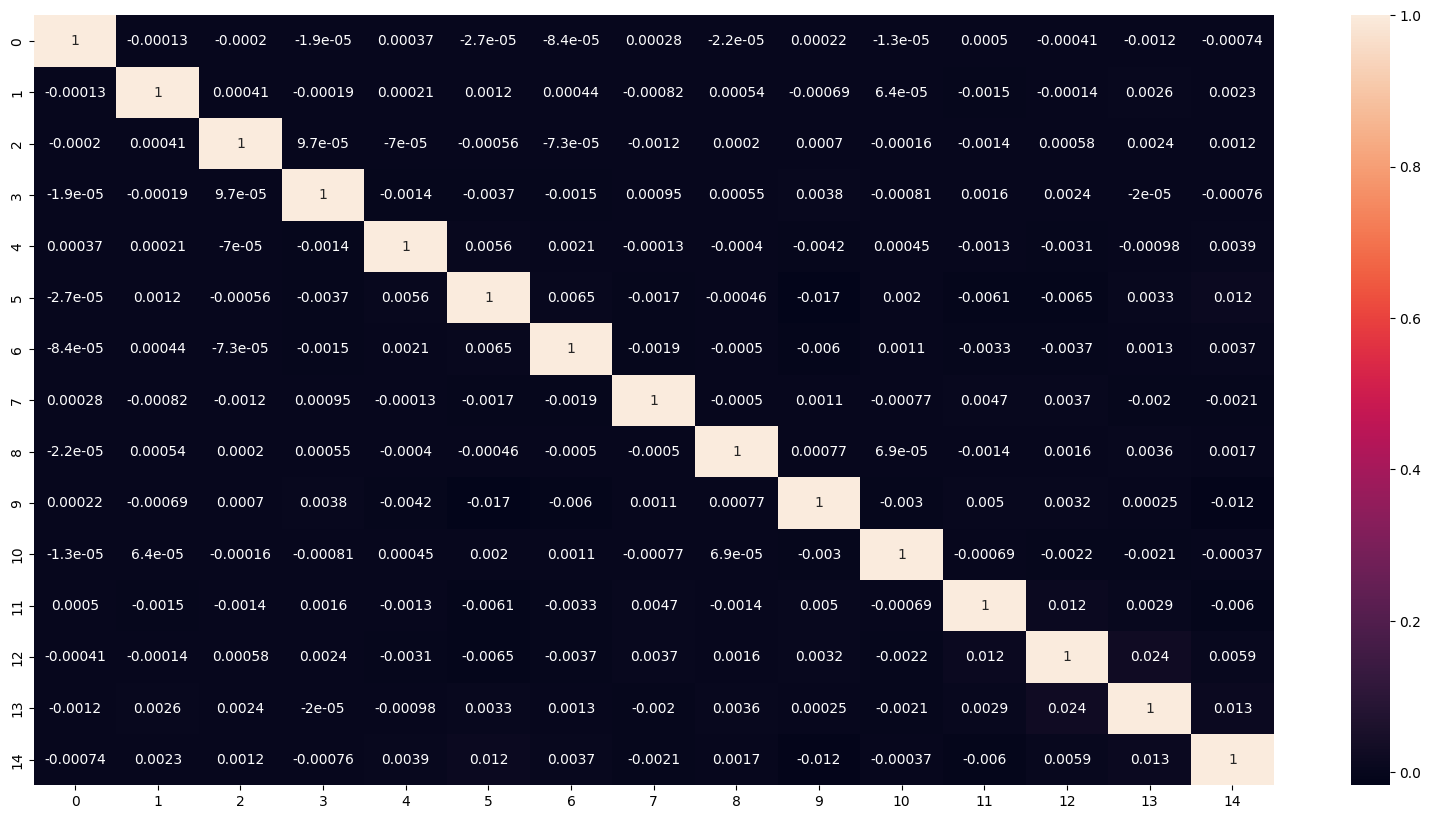

In [67]:
#plotting the correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
plt.figure(figsize=[20,10])
sns.heatmap(corrmat, annot=True)

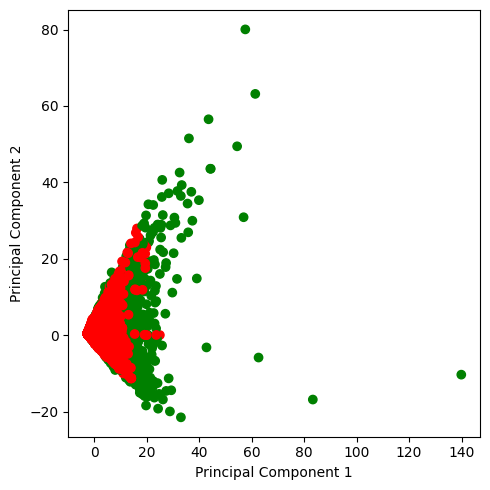

In [68]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### 7. Logistic Regression ( With RFE and PCA)

#### Applying logistic regression with RFE

In [69]:
logreg= LogisticRegression(random_state=100)
#Let's try RFE with 15 feature
rfe = RFE(logreg,step = 15)

In [70]:
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 3),
 ('circle_id', False, 3),
 ('arpu_6', True, 1),
 ('arpu_7', False, 2),
 ('arpu_8', False, 2),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', False, 2),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('last_day_rch_amt_6', False, 3),
 ('last_day_rch_amt_7', False, 3),
 ('last_day_rch_amt_8', True, 1),
 ('monthly_2g_6', True, 1),
 ('monthly_2g_7', True, 1),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 3),
 ('sachet_2g_7', False, 3),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', True, 1),
 ('monthly_3g_7', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_6', False, 3),
 ('sachet_3g_7', False, 2),
 ('sachet_3g_8', True, 1),
 ('aon', True, 1),
 ('Average_recharge_amt', False, 3),
 ('total_rech_6', False, 2),
 ('total_rech_7', False, 2),
 ('total_rech_8', True, 1),
 ('roam_any_6', False, 3),
 ('roam_any_7', False, 3),
 ('roam_any_8', False, 3),
 ('local_any_6', True, 1),
 ('local_any_7', F

In [72]:
# feature selected by RFE
col = X_train.columns[rfe.support_]
rfe_df = pd.DataFrame({'Feature':col})
rfe_df.head(20)


,Feature
0,arpu_6
1,total_og_mou_6
2,total_og_mou_7
3,total_og_mou_8
4,total_ic_mou_7
5,total_ic_mou_8
6,last_day_rch_amt_8
7,monthly_2g_6
8,monthly_2g_7
9,monthly_2g_8


In [73]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
modres = logm.fit()
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                87932
Model:                            GLM   Df Residuals:                    87908
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36589.
Date:                Sat, 01 Apr 2023   Deviance:                       73177.
Time:                        16:57:31   Pearson chi2:                 4.74e+15
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4254
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7693      0.014    -54.967      0.000      -0.797      -0.742
arpu_6                 0.4715      0.024     19.347      0.000       0.424       0.519
total_og_mou_6        -0.5087      0.068     -7.448      0.000      -0.643      -0.375
total_og_mou_7         0.9605      0.063     15.252      0.000       0.837       1.084
total_og_mou_8         0.2166      0.139      1.561      0.118      -0.055       0.488
total_ic_mou_7         0.3809      0.028     13.597      0.000       0.326       0.436
total_ic_mou_8        -0.5551      0.068     -8.185      0.000      -0.688      -0.422
last_day_rch_amt_8    -0.3749      0.016    -23.839      0.000      -0.406      -0.344
monthly_2g_6          -0.2796      0.016    -17.848      0.000      -0.310      -0.249
monthly_2g_7          -0.3632      0.019    -19.252      0.000      -0.400      -0.326
monthly_2g_8          -0.5028      0.023    -22.096      0.000      -0.547      -0.458
sachet_2g_8           -0.8820      0.025    -35.500      0.000      -0.931      -0.833
monthly_3g_6          -0.1934      0.016    -11.897      0.000      -0.225      -0.162
monthly_3g_7          -0.2052      0.019    -10.532      0.000      -0.243      -0.167
monthly_3g_8          -0.4671      0.024    -19.638      0.000      -0.514      -0.420
sachet_3g_8           -0.5041      0.028    -17.808      0.000      -0.560      -0.449
aon                   -0.3208      0.010    -31.880      0.000      -0.340      -0.301
total_rech_8           0.3234      0.038      8.553      0.000       0.249       0.398
local_any_6            0.2844      0.033      8.711      0.000       0.220       0.348
local_any_8           -3.0854      0.103    -29.947      0.000      -3.287      -2.883
std_any_6              0.4052      0.061      6.688      0.000       0.286       0.524
std_any_7             -0.5342      0.061     -8.730      0.000      -0.654      -0.414
std_any_8             -0.9828      0.123     -7.992      0.000      -1.224      -0.742
data_used_7            0.3848      0.019     20.467      0.000       0.348       0.422
======================================================================================
"""

In [74]:
X_train_sm

,const,arpu_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,...,monthly_3g_8,sachet_3g_8,aon,total_rech_8,local_any_6,local_any_8,std_any_6,std_any_7,std_any_8,data_used_7
0,1.0,-0.424642,-0.634287,-0.531270,-0.463396,-0.527182,-0.416038,-0.192405,-0.202132,-0.204317,...,-0.163228,1.929934,0.119508,2.726731,-0.558049,-0.408531,-0.514814,-0.423208,-0.384560,0.444127
1,1.0,-0.543817,-0.532968,-0.444884,-0.238853,1.322024,1.527220,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,-0.313818,-0.390182,0.432929,0.824466,-0.356762,-0.324844,-0.035473,-0.266037
2,1.0,1.364875,1.388017,1.833533,1.759108,0.709450,0.693099,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,2.695322,0.401811,2.086439,2.244514,0.092693,0.741977,0.340965,-0.266037
3,1.0,-0.561123,-0.576230,-0.443378,0.099848,-0.131482,0.283754,2.210002,-0.202132,-0.204317,...,-0.163228,-0.098404,0.244793,0.094275,-0.336379,0.266291,-0.377718,-0.364227,0.076024,-0.266037
4,1.0,-0.633264,-0.395108,-0.205932,-0.235428,0.574763,0.666919,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,2.503372,-0.390182,0.234965,0.614949,-0.431188,-0.409761,-0.374421,-0.266037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87927,1.0,-0.655376,-0.518700,-0.480879,-0.494131,-0.441613,-0.474621,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,-0.187383,-0.390182,-0.329024,-0.491392,-0.514195,-0.461375,-0.379789,-0.239085
87928,1.0,-0.383898,-0.659654,-0.533879,-0.357372,-0.545901,-0.390056,-0.394477,-0.202132,-0.204317,...,-0.163228,-0.098404,1.386151,-0.351660,-0.629304,-0.484909,-0.517547,-0.387249,-0.186168,-0.266037
87929,1.0,-0.382484,-0.403249,-0.474062,-0.504419,-0.353552,-0.518207,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,-0.580480,-0.390182,0.263174,-0.529291,-0.507460,-0.461375,-0.384560,-0.266037
87930,1.0,-0.692631,-0.615530,1.147439,-0.504419,-0.392390,-0.518207,-0.473061,-0.202132,-0.204317,...,-0.163228,-0.098404,-0.558641,-0.032295,-0.618822,-0.529291,-0.470425,1.362119,-0.384560,-0.266037


In [75]:
y_train_pred = modres.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00452856, 0.03654432, 0.00279699, ..., 0.84796288, 0.89300633,
       0.9142711 ])

In [76]:
y_train_pred = modres.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'churn_probability':y_train.values, 'churn':y_train_pred})


y_train_pred_final['predicted'] = y_train_pred_final.churn.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn_probability,churn,predicted
0,0,0.004529,0
1,0,0.036544,0
2,0,0.002797,0
3,0,0.064831,0
4,0,0.050867,0


In [77]:
confusion_rfe = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final.predicted )
print(confusion_rfe)

[[34187  9779]
 [ 4810 39156]]


In [78]:
Accuracy = round(metrics.accuracy_score(y_train_pred_final.churn_probability, y_train_pred_final.predicted), 4) * 100

In [79]:
def getcutoffmatrix(confusion, Accuracy, actual, predicted):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    Sensitivity = round(TP / float(TP+FN), 4) * 100
    # Let us calculate specificity
    Specificity = round(TN / float(TN+FP), 4) * 100
    # Let's see the recall of our logistic regression model
    Recall= round(TP / float(TP+FN), 4) * 100
    #lets see what the precision looks like
    Precision = round(TP / float(TP+FP), 4) * 100
    ## Let's get precision score
    Precision_score = round(precision_score(actual, predicted), 4) * 100
    parameter = np.array(['Accuracy','Sensitivity','Specificity','Precision','Recall','Precision_score'])
    figure = np.array([Accuracy,Sensitivity,Specificity,Precision,Recall,Precision_score])

    cutoffmatrix_df = pd.DataFrame({'Parameter':parameter, 'Score':figure})
    return cutoffmatrix_df

Presenting score in dataframe

In [80]:
cutoffmatrix_df = getcutoffmatrix(confusion_rfe, Accuracy, y_train_pred_final.churn_probability, y_train_pred_final.predicted  )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,83.41
1,Sensitivity,89.06
2,Specificity,77.76
3,Precision,80.02
4,Recall,89.06
5,Precision_score,80.02


In [81]:
def plot_roc_curve(y_test, y_test_score):
 
 fpr, tpr, _ = roc_curve(y_test, y_test_score)
 roc_auc = auc(fpr, tpr)
 plt.figure(figsize=(5, 5))
 plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
 plt.plot([0, 1], [0, 1])
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel("False Positive Rate")
 plt.ylabel("True Positive Rate")
 plt.title("Receiver operating characteristic")
 plt.legend(loc="lower right")
 plt.show()

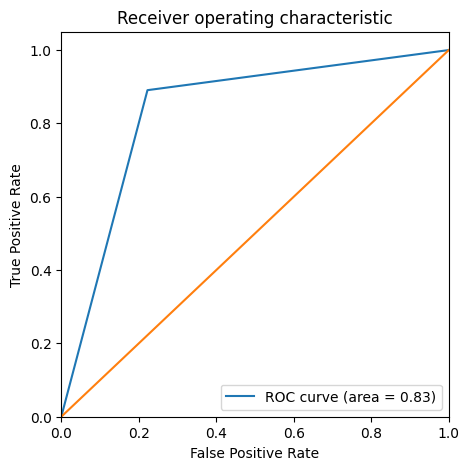

In [82]:
plot_roc_curve(y_train_pred_final.churn_probability, y_train_pred_final.predicted)

#### Applying logistic regression on the data on Principal components

In [83]:
#training the regression model
logreg_pca = LogisticRegression(random_state=100)
model_pca = logreg_pca.fit(X_train_pca,y_train)


In [84]:
round(model_pca.score(X_train_pca, y_train) * 100, 2)

80.96

In [85]:
# Predicted probabilities
pred_probs_train = model_pca.predict_proba(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_train)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.head( )

,1
0,0.014318
1,0.181959
2,0.023660
3,0.102700
4,0.161150


In [86]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,churn_probability
0,0
1,0
2,0
3,0
4,0


In [87]:
# Putting index
y_train_df['I'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn'})
# Rearranging the columns
y_pred_final.iloc[:,[1,0,2]].head( )
#y_pred_final = y_pred_final.reindex_axis(['I', 'Churn', 'Churn_Probability'], axis=1)
# Let's see the head of y_pred_final
#y_pred_final.head()

,I,churn_probability,Churn
0,0,0,0.014318
1,1,0,0.181959
2,2,0,0.023660
3,3,0,0.102700
4,4,0,0.161150


In [88]:
print(y_pred_final.Churn.mean())

0.5000026781931477


In [89]:
# Creating new column 'Predicted' with 1 if Churn > 0.06 else 0
y_pred_final['Predicted'] = y_pred_final.Churn.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.iloc[:,[1,0,2,3]].head(15)

,I,churn_probability,Churn,Predicted
0,0,0,0.014318,0
1,1,0,0.181959,0
2,2,0,0.023660,0
3,3,0,0.102700,0
4,4,0,0.161150,0
5,5,0,0.004834,0
6,6,1,0.480932,0
7,7,0,0.025232,0
8,8,0,0.576972,1
9,9,0,0.256791,0


In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.Predicted)
confusion

array([[33582, 10384],
       [ 6362, 37604]], dtype=int64)

In [91]:
Accuracy = round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100

Presenting score in dataframe

In [92]:
cutoffmatrix_df = getcutoffmatrix(confusion , Accuracy, y_pred_final.churn_probability, y_pred_final.Predicted )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,80.96
1,Sensitivity,85.53
2,Specificity,76.38
3,Precision,78.36
4,Recall,85.53
5,Precision_score,78.36


In [93]:
##Let's check the overall accuracy.
#Accuracy = round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100

#TP = confusion[1,1] # true positive 
#TN = confusion[0,0] # true negatives
#FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
#Sensitivity = round(TP / float(TP+FN), 4) * 100
# Let us calculate specificity
#Specificity = round(TN / float(TN+FP), 4) * 100
# Let's see the recall of our logistic regression model
#Recall= round(TP / float(TP+FN), 4) * 100
#lets see what the precision looks like
#Precision = round(TP / float(TP+FP), 4) * 100
## Let's get precision score
#Precision_score = round(precision_score(y_pred_final.churn_probability, y_pred_final.Predicted), 4) * 100

Plot ROC curve

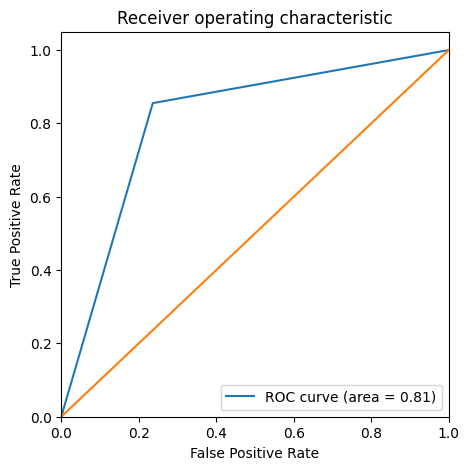

In [94]:
plot_roc_curve(y_pred_final.churn_probability, y_pred_final.Predicted)

#### PCA - Evaluation on Test set

In [95]:
# Making prediction on the test data
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape


(21000, 15)

In [96]:
round(model_pca.score(X_test_pca, y_test) * 100, 2)

57.2

In [97]:
pred_prob_test = model_pca.predict_proba(X_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test[:,1]))


'0.86'

In [98]:
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(pred_prob_test)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.head()

,1
0,0.893249
1,0.979514
2,0.898071
3,0.449163
4,0.759336


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
3425,1
33067,1
52420,0
5220,0
33958,1


In [100]:
# Putting index
y_test_df['I'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df], axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn'})
# Rearranging the columns
y_test_pred_final.iloc[:,[1,0,2]].head()
#y_pred_final = y_pred_final.reindex_axis(['I', 'Churn', 'Churn_Probability'], axis=1)
# Let's see the head of y_pred_final
#y_pred_final.head()

,I,churn_probability,Churn
0,3425,1,0.893249
1,33067,1,0.979514
2,52420,0,0.898071
3,5220,0,0.449163
4,33958,1,0.759336


In [101]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.churn_probability.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_test_pred_final.iloc[:,[1,0,2,3]].head()

,I,churn_probability,Churn,Predicted
0,3425,1,0.893249,1
1,33067,1,0.979514,1
2,52420,0,0.898071,0
3,5220,0,0.449163,0
4,33958,1,0.759336,1


In [102]:
# Confusion matrix on test data set 
confusion_test = metrics.confusion_matrix(y_test_pred_final.churn_probability, y_test_pred_final.Predicted)
confusion_test

array([[18901,     0],
       [    0,  2099]], dtype=int64)

In [103]:
##Let's check the overall accuracy.
Accuracy = round(metrics.accuracy_score(y_test_pred_final.churn_probability, y_test_pred_final.Predicted), 4) * 100

Presenting score in dataframe

In [104]:
cutoffmatrix_df = getcutoffmatrix(confusion_test , Accuracy, y_test_pred_final.churn_probability, y_test_pred_final.Predicted )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,100.0
1,Sensitivity,100.0
2,Specificity,100.0
3,Precision,100.0
4,Recall,100.0
5,Precision_score,100.0


Plot ROC curve

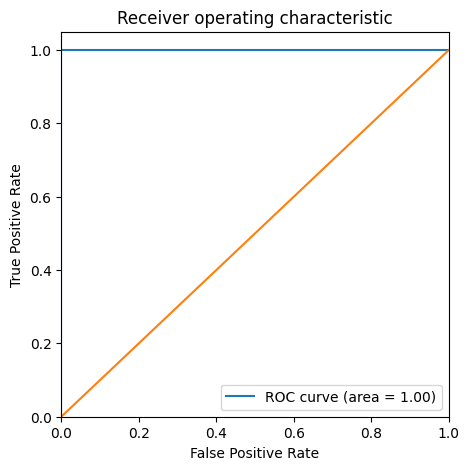

In [105]:
plot_roc_curve(y_test_pred_final.churn_probability, y_test_pred_final.Predicted)

### 8. Decision Trees  

In [106]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [107]:
# Decision tree doesn't need scaling, so overwriting X_train and y_train
X_train = X_train_resampled
y_train = y_train_resampled

In [108]:
dt_base.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [109]:
y_train_pred = dt_base.predict(X_train_resampled)
y_test_pred = dt_base.predict(X_test)

In [110]:
Accuracy = metrics.accuracy_score(y_test, y_test_pred) * 100

In [111]:
# Printing confusion matrix
confusion_dt = confusion_matrix(y_test,y_test_pred)
confusion_dt

array([[ 7552, 11349],
       [  142,  1957]], dtype=int64)

Presenting score in dataframe

In [112]:
cutoffmatrix_df = getcutoffmatrix(confusion_dt , Accuracy, y_test, y_test_pred )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,45.280952
1,Sensitivity,93.230000
2,Specificity,39.960000
3,Precision,14.710000
4,Recall,93.230000
5,Precision_score,14.710000


In [113]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.40      0.57     18901
           1       0.15      0.93      0.25      2099

    accuracy                           0.45     21000
   macro avg       0.56      0.67      0.41     21000
weighted avg       0.90      0.45      0.54     21000



Plot the ROC curve

In [114]:

def get_auc_scores(clf, X_train_resampled, X_test, y_train_resampled, y_test):

 y_train_score = clf.predict_proba(X_train_resampled)[:, 1]
 y_test_score = clf.predict_proba(X_test)[:, 1]
 auc_train = roc_auc_score(y_train_resampled, y_train_score)
 auc_test = roc_auc_score(y_test, y_test_score)
 print("Training AUC: {0}Testing AUC: {1}".format(auc_train,auc_test ))

 return y_test_score

In [115]:
y_test_score = get_auc_scores(dt_base, X_train_resampled, X_test, y_train_resampled, y_test)

Training AUC: 0.9301514288843855Testing AUC: 0.8414928677669778


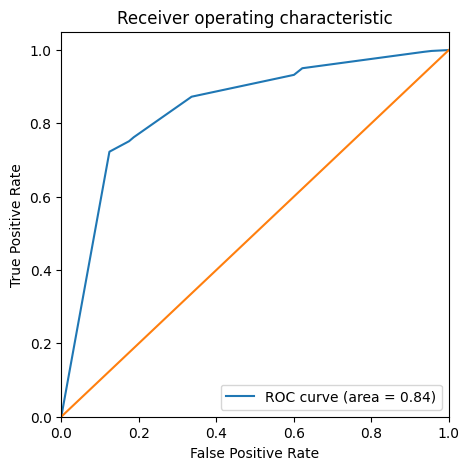

In [116]:
plot_roc_curve(y_test, y_test_score)

#### Hyper-parameter tuning for the Decision Tree

In [117]:
dt = DecisionTreeClassifier(random_state=42)

In [118]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [119]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [120]:
%%time
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: total: 2.86 s
Wall time: 48.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [121]:
grid_search.best_score_

0.894918800891598

In [122]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [123]:
y_test_pred2 = dt_best.predict(X_test)

In [124]:
Accuracy = metrics.accuracy_score(y_test, y_test_pred2) * 100

In [125]:
# Printing confusion matrix
confusion_dt2 = confusion_matrix(y_test,y_test_pred2)
confusion_dt2

array([[8992, 9909],
       [ 206, 1893]], dtype=int64)

Presenting score in dataframe

In [126]:
cutoffmatrix_df = getcutoffmatrix(confusion_dt2 , Accuracy, y_test, y_test_pred2 )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,51.833333
1,Sensitivity,90.190000
2,Specificity,47.570000
3,Precision,16.040000
4,Recall,90.190000
5,Precision_score,16.040000


In [127]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.98      0.48      0.64     18901
           1       0.16      0.90      0.27      2099

    accuracy                           0.52     21000
   macro avg       0.57      0.69      0.46     21000
weighted avg       0.90      0.52      0.60     21000



In [128]:
y_test_score_best = get_auc_scores(dt_best, X_train_resampled, X_test, y_train_resampled, y_test)

Training AUC: 0.9663063804960064Testing AUC: 0.8142598609202147


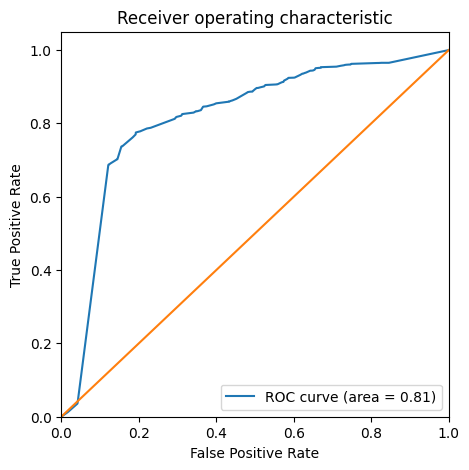

In [129]:
plot_roc_curve(y_test, y_test_score_best)

### 9. ADA boosting with Decision Tree

In [130]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [131]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train_resampled, y_train_resampled)
y_trainpred = shallow_tree.predict(X_train_resampled)
metrics.accuracy_score(y_train_resampled, y_trainpred)


0.8359414092708002

In [132]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABClassifier.fit(X_train_resampled, y_train_resampled)
    y_pred = ABClassifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

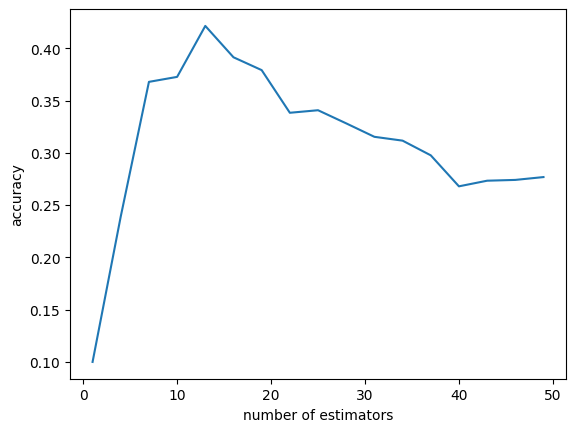

In [133]:
# plot accuracy and n_estimators
# plot
plt.plot( estimators,abc_scores )
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.show()

#### ## Based on above graph it looks like 13 trees are giving maximum accuracy.

In [134]:
ABClassifier = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 13)
    
ABClassifier.fit(X_train_resampled, y_train_resampled)
y_pred = ABClassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred) * 100
print(score)


42.142857142857146


In [135]:
# Printing confusion matrix
confusion_ada = confusion_matrix(y_test,y_pred)
confusion_ada

array([[ 6839, 12062],
       [   88,  2011]], dtype=int64)

Presenting score in dataframe

In [136]:
cutoffmatrix_df = getcutoffmatrix(confusion_ada , score, y_test, y_pred )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,42.142857
1,Sensitivity,95.810000
2,Specificity,36.180000
3,Precision,14.290000
4,Recall,95.810000
5,Precision_score,14.290000


In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53     18901
           1       0.14      0.96      0.25      2099

    accuracy                           0.42     21000
   macro avg       0.57      0.66      0.39     21000
weighted avg       0.90      0.42      0.50     21000



Plot ROC curve

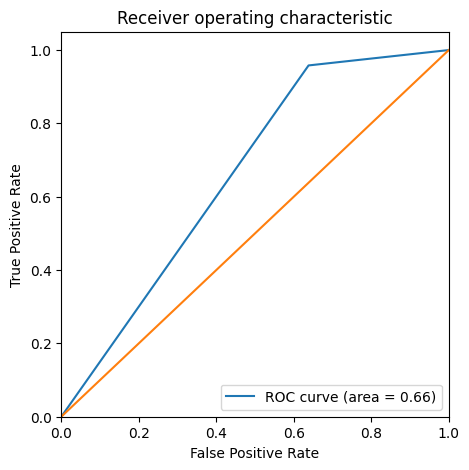

In [138]:
plot_roc_curve(y_test, y_pred)

### 10. Random Forest

In [139]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [140]:
%%time
rf.fit(X_train_resampled, y_train_resampled)

CPU times: total: 875 ms
Wall time: 860 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [141]:
rf.oob_score_

0.8515557476231633

In [142]:
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

In [143]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.42      0.59     18901
           1       0.16      0.95      0.27      2099

    accuracy                           0.48     21000
   macro avg       0.57      0.69      0.43     21000
weighted avg       0.90      0.48      0.56     21000



In [144]:
y_test_score_rf = get_auc_scores(rf, X_train_resampled, X_test, y_train_resampled, y_test)

Training AUC: 0.9339218714492216Testing AUC: 0.8771866871637953


In [145]:
confusion_rf = confusion_matrix(y_test,y_test_pred)
confusion_rf

array([[ 7996, 10905],
       [   97,  2002]], dtype=int64)

In [146]:
Accuracy = round(metrics.accuracy_score(y_test, y_test_pred), 4) * 100

Presenting score in dataframe

In [147]:
cutoffmatrix_df = getcutoffmatrix(confusion_rf , Accuracy, y_test, y_test_pred )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,47.61
1,Sensitivity,95.38
2,Specificity,42.30
3,Precision,15.51
4,Recall,95.38
5,Precision_score,15.51


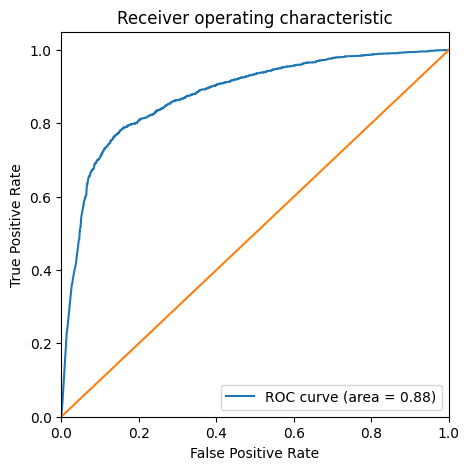

In [148]:
plot_roc_curve(y_test, y_test_score_rf)

#### Hyper-parameter tuning for the Random Forest

In [149]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [150]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [151]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [152]:
%%time
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 49.2 s
Wall time: 10min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [153]:
grid_search.best_score_

0.9298776327161897

In [154]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [155]:
y_test_pred2 = rf_best.predict(X_test)


In [156]:
confusion_rf2 = confusion_matrix(y_test,y_test_pred2)
confusion_rf2

array([[9501, 9400],
       [ 146, 1953]], dtype=int64)

In [157]:
Accuracy = round(metrics.accuracy_score(y_test, y_test_pred2), 4) * 100

Presenting score in dataframe

In [158]:
cutoffmatrix_df = getcutoffmatrix(confusion_rf2 , Accuracy, y_test, y_test_pred2 )
cutoffmatrix_df

,Parameter,Score
0,Accuracy,54.54
1,Sensitivity,93.04
2,Specificity,50.27
3,Precision,17.20
4,Recall,93.04
5,Precision_score,17.20


In [159]:
y_test_score_rf_best = get_auc_scores(rf_best, X_train_resampled, X_test, y_train_resampled, y_test)

Training AUC: 0.9952436402220538Testing AUC: 0.8640483717988056


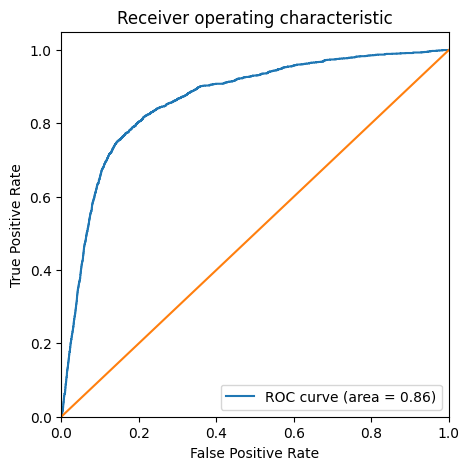

In [160]:
plot_roc_curve(y_test, y_test_score_rf_best)

In [161]:
rf_best.feature_importances_

array([0.01008032, 0.        , 0.00953925, 0.01346838, 0.06839308,
       0.00916175, 0.01229713, 0.09188928, 0.01036594, 0.01318722,
       0.1317252 , 0.01154707, 0.01348015, 0.03882233, 0.00183285,
       0.00284141, 0.00258933, 0.0008773 , 0.00134919, 0.00560129,
       0.00066651, 0.00088978, 0.00246798, 0.00027763, 0.00033167,
       0.00087332, 0.0150116 , 0.        , 0.00817699, 0.01146319,
       0.07522676, 0.01350585, 0.02920968, 0.09892918, 0.01387434,
       0.02865473, 0.14200051, 0.00964411, 0.0115216 , 0.02601967,
       0.0093135 , 0.01346403, 0.01823115, 0.00418022, 0.00682041,
       0.01019712])

### 11. Conclusion

### We ran the following models and have summarized our findings in the table below -

    - Logistic Regression with RFE
    - Logistic Regression with PCA
    - Decision Tree
    - ADA Boosting with Decision Tree
    - Random Forest


| Methodology | AUC |
| --- | --- |
| Logistic Regression with RFE | 0.83 |
| Logistic Regression with PCA | 0.81 |
| Decision Tree | 0.81 |
| ADA Boosting with DT | 0.66 |
| Random Forests | 0.86 |

#### We see that almost on all models the values are coming very similar to each other 

#### Since AUC is important factor, we feel that going ahead with Random forests for prediction on test.csv dataset


## Execution of Random forest model on test.csv dataset

### 1. Data cleaning and Preparation

In [162]:
# Load Dataset
telecom_dataset_test = pd.read_csv("test.csv")

In [163]:
# Find total number of rows and columns
telecom_dataset_test.shape

(30000, 171)

In [164]:
# Preview Dataset
telecom_dataset_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


#### Handling Null Values

In [165]:
# Find the percentage of null values present in the dataset
round(100*telecom_dataset_test.isnull().mean(), 2).sort_values(ascending=False)
# Checking information about data.
print(telecom_dataset_test.info())
metadata_matrix(telecom_dataset_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,7585,22415,74.72,2676
count_rech_3g_6,float64,7585,22415,74.72,23
fb_user_6,float64,7585,22415,74.72,2
night_pck_user_6,float64,7585,22415,74.72,2
total_rech_data_6,float64,7585,22415,74.72,28
...,...,...,...,...,...
last_day_rch_amt_8,int64,30000,0,0.00,167
vol_2g_mb_6,float64,30000,0,0.00,5578
vol_2g_mb_7,float64,30000,0,0.00,5627
vol_2g_mb_8,float64,30000,0,0.00,5616


In [166]:
#Checking for missing values.
missing_values = metadata_matrix(telecom_dataset_test)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
arpu_3g_6,float64,74.72
fb_user_6,float64,74.72
night_pck_user_6,float64,74.72
total_rech_data_6,float64,74.72
max_rech_data_6,float64,74.72
...,...,...
id,int64,0.00
vol_3g_mb_7,float64,0.00
total_rech_num_7,int64,0.00
last_date_of_month_6,object,0.00


In [167]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_upd = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',  'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',  'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',  'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',  'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',  'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',  'og_others_6', 'og_others_7', 'og_others_8']
telecom_dataset_test[og_data_columns_upd] = telecom_dataset_test[og_data_columns_upd].fillna(0)
telecom_dataset_test[og_data_columns_upd].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,...,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,24.88,...,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,75.51,...,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0
2,7.54,7.86,8.40,16.98,45.81,45.04,24.53,53.68,54.44,0.00,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,5.31,...,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.45,...,749.29,0.0,0.0,0.0,0.71,5.39,4.96,2.2,0.0,0.0


In [168]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer

ic_data_columns_upd = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',  'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',  'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',  'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',  'ic_others_6', 'ic_others_7', 'ic_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',  'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
telecom_dataset_test[ic_data_columns_upd] = telecom_dataset_test[ic_data_columns_upd].fillna(0)
telecom_dataset_test[ic_data_columns_upd].head()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,...,ic_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8
0,0.00,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,...,0.00,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00
1,0.00,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,...,0.00,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00
2,22.81,103.38,26.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,546.06,504.86,531.64,0.00,4.26,0.00,9.63,...,0.00,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64
4,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,...,0.16,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00


In [169]:
## Fill null values for data pack recharge amount and count to 0 
## 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 
## 'max_rech_data_8',  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
## 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',  'av_rech_amt_data_6', 'av_rech_amt_data_7','av_rech_amt_data_8','loc_og_t2o_mou'
## 'std_og_t2o_mou','loc_ic_t2o_mou'
data_recharge_columns_upd = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',  'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
telecom_dataset_test[data_recharge_columns_upd] = telecom_dataset_test[data_recharge_columns_upd].fillna(0)
telecom_dataset_test[data_recharge_columns_upd].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
#finding missing values more than 70%
metadata = metadata_matrix(telecom_dataset)
condition = metadata['Null_Percentage'] > 70
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count


### 2. Feature Engineering

In [171]:
# remove high missing values from original dataframe
high_missing_value_columns = high_missing_values.index
high_missing_value_columns
telecom_dataset_test.drop(columns=high_missing_value_columns, inplace=True)
telecom_dataset_test['Average_recharge_amt'] = (telecom_dataset_test['total_rech_amt_6'].median() + telecom_dataset_test['total_rech_amt_7'].median() + telecom_dataset_test['total_rech_amt_8'].median())/3
# Take high value customers whose average recharge amount is greater than 70th percentile
telecom_dataset_test=telecom_dataset_test[(telecom_dataset_test['Average_recharge_amt']>= telecom_dataset_test['Average_recharge_amt'].quantile(0.7))]

In [172]:
telecom_dataset_test['total_data_rech_amt_6'] = telecom_dataset_test['total_rech_data_6'] * telecom_dataset_test['av_rech_amt_data_6']
telecom_dataset_test['total_data_rech_amt_7'] = telecom_dataset_test['total_rech_data_7'] * telecom_dataset_test['av_rech_amt_data_7']
telecom_dataset_test['total_data_rech_amt_8'] = telecom_dataset_test['total_rech_data_8'] * telecom_dataset_test['av_rech_amt_data_8']
telecom_dataset_test['total_rech_6'] = telecom_dataset_test['total_data_rech_amt_6'] + telecom_dataset_test['total_rech_amt_6']
telecom_dataset_test['total_rech_7'] = telecom_dataset_test['total_data_rech_amt_7'] + telecom_dataset_test['total_rech_amt_7']
telecom_dataset_test['total_rech_8'] = telecom_dataset_test['total_data_rech_amt_8'] + telecom_dataset_test['total_rech_amt_8']
## Removing 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'
## Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 

telecom_dataset_test = telecom_dataset_test.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'])
telecom_dataset_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Average_recharge_amt,total_rech_6,total_rech_7,total_rech_8
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,NaN,NaN,1692,0.00,0.00,0.00,225.0,103.0,90.0,60.0
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,NaN,NaN,2533,0.00,0.00,0.00,225.0,500.0,500.0,500.0
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,NaN,NaN,277,525.61,758.41,241.84,225.0,500.0,1000.0,1000.0
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,NaN,NaN,1244,0.00,0.00,0.00,225.0,110.0,260.0,0.0
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,NaN,NaN,462,0.00,0.00,0.00,225.0,356.0,490.0,546.0


In [173]:
## Add all roaming incoming and outgoing columns and add a new column 
telecom_dataset_test['roam_any_6'] = telecom_dataset_test['roam_ic_mou_6'] + telecom_dataset_test['roam_og_mou_6'] 
telecom_dataset_test['roam_any_7'] = telecom_dataset_test['roam_ic_mou_7'] + telecom_dataset_test['roam_og_mou_7'] 
telecom_dataset_test['roam_any_8'] = telecom_dataset_test['roam_ic_mou_8'] + telecom_dataset_test['roam_og_mou_8'] 

In [174]:
# dropping all roaming incoming and outgoing columns
telecom_dataset_test = telecom_dataset_test.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])

In [175]:
## Add all local incoming and outgoing columns and add a new column 
telecom_dataset_test['local_any_6'] = telecom_dataset_test.loc_og_t2t_mou_6 + telecom_dataset_test.loc_og_t2m_mou_6 + telecom_dataset_test.loc_og_t2f_mou_6 + telecom_dataset_test.loc_og_t2c_mou_6 + telecom_dataset_test.loc_og_mou_6 + telecom_dataset_test.loc_ic_t2t_mou_6 + telecom_dataset_test.loc_ic_t2m_mou_6 + telecom_dataset_test.loc_ic_t2f_mou_6+ telecom_dataset_test.loc_ic_mou_6
telecom_dataset_test['local_any_7'] = telecom_dataset_test.loc_og_t2t_mou_7 + telecom_dataset_test.loc_og_t2m_mou_7 + telecom_dataset_test.loc_og_t2f_mou_7 + telecom_dataset_test.loc_og_t2c_mou_7 + telecom_dataset_test.loc_og_mou_7 + telecom_dataset_test.loc_ic_t2t_mou_7 + telecom_dataset_test.loc_ic_t2m_mou_7 + telecom_dataset_test.loc_ic_t2f_mou_7+ telecom_dataset_test.loc_ic_mou_7
telecom_dataset_test['local_any_8'] = telecom_dataset_test.loc_og_t2t_mou_8 + telecom_dataset_test.loc_og_t2m_mou_8 + telecom_dataset_test.loc_og_t2f_mou_8 + telecom_dataset_test.loc_og_t2c_mou_8 + telecom_dataset_test.loc_og_mou_8 + telecom_dataset_test.loc_ic_t2t_mou_8 + telecom_dataset_test.loc_ic_t2m_mou_8 + telecom_dataset_test.loc_ic_t2f_mou_8+ telecom_dataset_test.loc_ic_mou_8

In [176]:
#dropping local incoming and outgoing coloumns
telecom_dataset_test = telecom_dataset_test.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])

In [177]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset_test['std_any_6'] = telecom_dataset_test.std_og_t2t_mou_6 + telecom_dataset_test.std_og_t2m_mou_6 + telecom_dataset_test.std_og_t2f_mou_6 + telecom_dataset_test.std_og_mou_6 + telecom_dataset_test.std_ic_t2t_mou_6 + telecom_dataset_test.std_ic_t2m_mou_6 + telecom_dataset_test.std_ic_t2f_mou_6 + telecom_dataset_test.std_ic_mou_6
telecom_dataset_test['std_any_7'] = telecom_dataset_test.std_og_t2t_mou_7 + telecom_dataset_test.std_og_t2m_mou_7 + telecom_dataset_test.std_og_t2f_mou_7 + telecom_dataset_test.std_og_mou_7 + telecom_dataset_test.std_ic_t2t_mou_7 + telecom_dataset_test.std_ic_t2m_mou_7 + telecom_dataset_test.std_ic_t2f_mou_7 + telecom_dataset_test.std_ic_mou_7
telecom_dataset_test['std_any_8'] = telecom_dataset_test.std_og_t2t_mou_8 + telecom_dataset_test.std_og_t2m_mou_8 + telecom_dataset_test.std_og_t2f_mou_8 + telecom_dataset_test.std_og_mou_8 + telecom_dataset_test.std_ic_t2t_mou_8 + telecom_dataset_test.std_ic_t2m_mou_8 + telecom_dataset_test.std_ic_t2f_mou_8 + telecom_dataset_test.std_ic_mou_8
#dropping standard incoming and outgoing coloumns
telecom_dataset_test = telecom_dataset_test.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])

In [178]:
## Add all standard incoming and outgoing columns and add a new column 
telecom_dataset_test['spl_any_6'] = telecom_dataset_test.isd_og_mou_6 + telecom_dataset_test.spl_og_mou_6 + telecom_dataset_test.og_others_6 + telecom_dataset_test.spl_ic_mou_6 + telecom_dataset_test.isd_ic_mou_6 + telecom_dataset_test.ic_others_6
telecom_dataset_test['spl_any_7'] = telecom_dataset_test.isd_og_mou_7 + telecom_dataset_test.spl_og_mou_7 + telecom_dataset_test.og_others_7 + telecom_dataset_test.spl_ic_mou_7 + telecom_dataset_test.isd_ic_mou_7 + telecom_dataset_test.ic_others_7
telecom_dataset_test['spl_any_8'] = telecom_dataset_test.isd_og_mou_8 + telecom_dataset_test.spl_og_mou_8 + telecom_dataset_test.og_others_8 + telecom_dataset_test.spl_ic_mou_8 + telecom_dataset_test.isd_ic_mou_8 + telecom_dataset_test.ic_others_8
## dropping all standard incoming and outgoing columns
telecom_dataset_test = telecom_dataset_test.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])

In [179]:
## Add all data 2g and 3g columns and add a new column 
telecom_dataset_test['data_used_6'] = telecom_dataset_test.vol_2g_mb_6 + telecom_dataset_test.vol_3g_mb_6 + telecom_dataset_test.jun_vbc_3g
telecom_dataset_test['data_used_7'] = telecom_dataset_test.vol_2g_mb_7 + telecom_dataset_test.vol_3g_mb_7 + telecom_dataset_test.jul_vbc_3g
telecom_dataset_test['data_used_8'] = telecom_dataset_test.vol_2g_mb_8 + telecom_dataset_test.vol_3g_mb_8 + telecom_dataset_test.aug_vbc_3g
# dropping all data 2g and 3g columns
telecom_dataset_test = telecom_dataset_test.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'])
telecom_dataset_test = telecom_dataset_test.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'])
## Dropping columns with all values as 0
telecom_dataset_test = telecom_dataset_test.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'])
## Drop  columns which will not add value 
telecom_dataset_test = telecom_dataset_test.drop(columns=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])
## max column can be removed as  total recharge column is there
telecom_dataset_test = telecom_dataset_test.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'])
## Removing columns 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

telecom_dataset_test = telecom_dataset_test.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'])
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', '
telecom_dataset_test = telecom_dataset_test.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'])
## Removing further columns to streamline data with train.csv
telecom_dataset_test = telecom_dataset_test.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'])
telecom_dataset_test.shape

(30000, 46)

In [180]:
# Introducing new column as churn probability with the assumption of 0 value
telecom_dataset_test['churn_probability'] = 0
telecom_dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30000 non-null  int64  
 1   circle_id             30000 non-null  int64  
 2   arpu_6                30000 non-null  float64
 3   arpu_7                30000 non-null  float64
 4   arpu_8                30000 non-null  float64
 5   total_og_mou_6        30000 non-null  float64
 6   total_og_mou_7        30000 non-null  float64
 7   total_og_mou_8        30000 non-null  float64
 8   total_ic_mou_6        30000 non-null  float64
 9   total_ic_mou_7        30000 non-null  float64
 10  total_ic_mou_8        30000 non-null  float64
 11  last_day_rch_amt_6    30000 non-null  int64  
 12  last_day_rch_amt_7    30000 non-null  int64  
 13  last_day_rch_amt_8    30000 non-null  int64  
 14  monthly_2g_6          30000 non-null  int64  
 15  monthly_2g_7       

In [181]:
X2 = telecom_dataset_test.drop(['churn_probability'], axis=1)

X2.head()

,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,...,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,69999,109,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,...,121.90,98.58,17.44,65.64,0.54,0.34,0.42,0.00,0.00,0.00
1,70000,109,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,...,1169.06,0.00,72.54,35.36,114.63,177.88,95.03,0.00,0.00,0.00
2,70001,109,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,241.84,758.41,525.61
3,70002,109,43.550,171.390,24.400,45.36,207.18,24.01,555.69,522.44,...,1108.98,93.44,225.33,17.66,0.00,13.46,9.80,0.00,0.00,0.00
4,70003,109,306.854,406.289,413.329,514.79,638.28,779.78,53.73,115.93,...,86.22,1105.23,1471.50,1781.52,2.91,5.39,5.12,0.00,0.00,0.00


In [182]:
y2 = telecom_dataset_test['churn_probability'] # response variable in Y

y2.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

### 3. Prediction using best model obtained from train dataset, which is Random Forest

In [183]:
y2_pred = rf_best.predict(X2)

In [184]:
confusion_rf3 = confusion_matrix(y2,y2_pred)
confusion_rf3

array([[27995,  2005],
       [    0,     0]], dtype=int64)

In [185]:
y2_pred_df = pd.DataFrame({'churn_probability':y2_pred})
y2_pred_df

,churn_probability
0,0
1,0
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,0
29998,0


 ### 4. Exporting data to solution.csv

In [186]:
solution_csv1 = pd.concat([X2,y2_pred_df], axis=1)
solution_csv = solution_csv1[['id','churn_probability']]

In [187]:
#export DataFrame to CSV file
solution_csv.to_csv("solution.csv")